In [9]:


import datetime as dt
import glob
import h5py
%matplotlib inline
import matplotlib.pyplot as plt
#from mpl_toolkits.basemap import Basemap
import numpy as np
import os
import pandas as pd
import xarray as xr
import ipdb


In [6]:
this_dir = '/media/ck/Elements/SouthAmerica/SMAP/'
L3_SM_P_dir = this_dir

flist = glob.glob(this_dir+'*.h5')
           
filename = flist[1]; 
print("File we are using: " + filename + '\n')

File we are using: /media/ck/Elements/SouthAmerica/SMAP/SMAP_L4_SM_aup_20150331T060000_Vv5030_001.h5



In [12]:
f = h5py.File(filename, 'r')
print('By using the command h5py.File() a filehandle is returned:')
print(f); print('\n')

print("Now lets look at the groups within the file to access:")
i=0;
for key in f.keys():
    print(str(i)+ '\t'+key)
    i+=1
group_id=list(f.keys())[0];# < Lets focus on the AM overpass for this example
print('\n')
i=0
print("Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:")
#ipdb.set_trace()
for var in list(f[group_id].keys()):
    print(str(i)+'\t'+var)
    i+=1

By using the command h5py.File() a filehandle is returned:
<HDF5 file "SMAP_L4_SM_aup_20150331T060000_Vv5030_001.h5" (mode r)>


Now lets look at the groups within the file to access:
0	Analysis_Data
1	EASE2_global_projection
2	Forecast_Data
3	Metadata
4	Observations_Data
5	cell_column
6	cell_lat
7	cell_lon
8	cell_row
9	time
10	x
11	y


Now lets look at the variables within the filegroup **Soil_Moisture_Retrieval_Data_AM** to access the actual data:
0	sm_profile_analysis
1	sm_profile_analysis_ensstd
2	sm_rootzone_analysis
3	sm_rootzone_analysis_ensstd
4	sm_surface_analysis
5	sm_surface_analysis_ensstd
6	soil_temp_layer1_analysis
7	soil_temp_layer1_analysis_ensstd
8	surface_temp_analysis
9	surface_temp_analysis_ensstd


In [13]:
print('the data has a shape of: '+str(f[group_id][list(f[group_id].keys())[0]].shape))

the data has a shape of: (1624, 3856)


In [15]:
var_id = list(f[group_id].keys())[2] # soil_moisture
sm_data = f[group_id][var_id][:,:]
sm_ds = f[group_id][var_id]
print('data are returned as '+str(type(sm_data)) + ' something easy to work with in python.')

data are returned as <class 'numpy.ndarray'> something easy to work with in python.


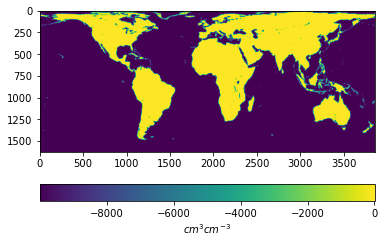

In [16]:
plt.imshow(sm_data)
cbar = plt.colorbar(orientation = 'horizontal')
cbar.set_label('$cm^3 cm^{-3}$')
